In [57]:
import xlwt
import sys
import pandas as pd
import matplotlib as mpl
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
import numpy as np 

In [31]:
data_10X = '/SGRNJ06/randd/USER/cjj/celedev/kemai/20220630/vdj/cr3/JT5/matched_del_clonotypes.csv'
data_SGR = '/SGRNJ06/randd/USER/cjj/celedev/kemai/20220630/vdj/cr3/SC3/matched_del_clonotypes.csv'

In [32]:
    data_10X = pd.read_csv(data_10X,sep=',')
    data_SGR = pd.read_csv(data_SGR,sep=',')

In [33]:
data_SGR

,clonotype_id,cdr3s_aa,frequency,proportion
0,clonotype4716,IGH:CARGITGNDYW;IGK:CQQRSNWPPTF,506,0.040734
1,clonotype3668,IGH:CARGADYW;IGK:CQQRSNWPPTF,375,0.030188
2,clonotype1943,IGH:CARDVGATIDYW;IGK:CQQRSNWPPTF,105,0.008453
3,clonotype7305,IGH:CTRGADYW;IGK:CQQRSNWPPTF,87,0.007004
4,clonotype6098,IGH:CARHSSSWEGWFDPW;IGK:CQQRSNWPPTF,73,0.005877
...,...,...,...,...
7432,clonotype2700,IGH:CAREGTGTTRLYFDYW;IGH:CARGADYW;IGH:CAREEEPR...,1,0.000081
7433,clonotype2699,IGH:CAREGTGTTRLYFDYW;IGH:CARGADYW;IGH:CARDVGAT...,1,0.000081
7434,clonotype2698,IGH:CAREGTGTTRLYFDYW;IGH:CARFGSYFDYW;IGH:CARGI...,1,0.000081
7435,clonotype2697,IGH:CAREGTGTTRLYFDYW;IGH:CAREVTHFDYW;IGH:CARGA...,1,0.000081


In [34]:
#data_10X_list = data_10X['cdr3s_nt'].tolist()
#data_SGR_list = data_SGR['cdr3s_nt'].tolist()
data_10X_list = data_10X['cdr3s_aa'].tolist()
data_SGR_list = data_SGR['cdr3s_aa'].tolist()
intersec_SGR_10X = set(data_10X_list).intersection(set(data_SGR_list))

In [35]:
    data_10X_set = set(data_10X_list)
    data_SGR_set = set(data_SGR_list)
    subset_ = [data_10X_set,data_SGR_set]
    venn2(subset_, set_labels = ('5-bcr-lib', 'SC-3'), set_colors=('r', 'g'))
    plt.savefig('/SGRNJ06/randd/USER/cjj/celedev/kemai/20220630/vdj/cr3/vn_clonotypes/Vnplot4.png')

In [43]:
data_10X_new = data_10X[data_10X.cdr3s_aa.isin(intersec_SGR_10X)]

In [44]:
data_SGR_new = data_SGR[data_SGR.cdr3s_aa.isin(intersec_SGR_10X)]

In [49]:
df_merge = pd.merge(data_10X_new,data_SGR_new, on='cdr3s_aa',how='inner',suffixes=('_10X', '_SGR'))

In [51]:
df_merge = df_merge[['cdr3s_aa','frequency_10X','frequency_SGR','proportion_10X','proportion_SGR']]

In [54]:
df_merge.to_csv('/SGRNJ06/randd/USER/cjj/celedev/kemai/20220630/vdj/cr3/vn_clonotypes/merge_clonotypes.csv',sep=',', index=False)

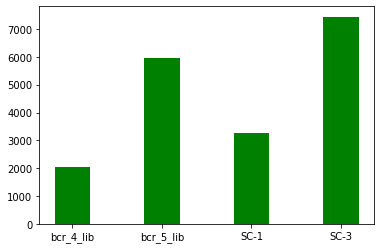

In [65]:
# Barplot
x = ['bcr_4_lib','bcr_5_lib','SC-1','SC-3']
y = [2028,5947,3278,7438]
fig = plt.figure()
plt.bar(x,y,0.4,color='green')
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title('Clonotypes')
#plt.show()
plt.savefig('/SGRNJ06/randd/USER/cjj/celedev/kemai/20220630/vdj/cr3/vn_clonotypes/barplot.jpg')

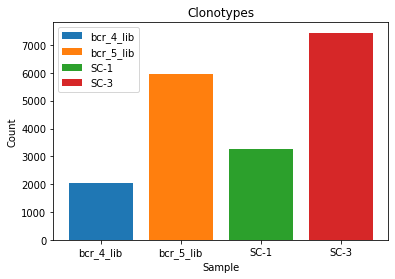

In [73]:

plt.rcParams['axes.unicode_minus']=False
for i in range(len(x)):
    plt.bar(x[i],y[i],label=x[i])
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Clonotypes')
plt.legend()
#plt.show()
plt.savefig('/SGRNJ06/randd/USER/cjj/celedev/kemai/20220630/vdj/cr3/vn_clonotypes/barplot.jpg', dpi=280)

In [ ]:
    clonotypes_num = []
    intersec_clonotypes_num = []
    clonotypes_num.append(len(data_10X_list))
    clonotypes_num.append(len(data_SGR_list))
    intersec_clonotypes_num.append((len(intersec_SGR_10X)))

    df_10X_sgr = data_10X[data_10X['cdr3s_nt'].isin(intersec_SGR_10X)]
    df_sgr_10X = data_SGR[data_SGR['cdr3s_nt'].isin(intersec_SGR_10X)]
    df_10X_sgr.to_csv('./df_10X_sgr.txt', sep='\t', index=False)
    df_sgr_10X.to_csv('./df_sgr_10X.txt', sep='\t', index=False)
    
    data_10X_set = set(data_10X_list)
    data_SGR_set = set(data_SGR_list)
    subset_ = [data_10X_set,data_SGR_set]
    venn2(subset_, set_labels = ('10X', 'SGR'), set_colors=('r', 'g'))
    plt.savefig('./Vnplot')